# Setting

In [42]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import matplotlib.font_manager as fm
import platform
plt.rcParams['font.family'] = 'AppleGothic'

# Data preview

In [44]:
sinkhole_map = gpd.read_file('data/raw_data/지반침하_위치도/지반침하지.shp', encoding='cp949')
construction_df = pd.read_csv('data/raw_data/서울시 건설 알림이 정보.csv', encoding='cp949')
building_underground_water_df = pd.read_csv('data/raw_data/서울시 건축물 유출지하수 현황.csv', encoding='cp949')
construction_underground_water_df = pd.read_csv('data/raw_data/서울시 공사현장 유출지하수 공간정보(2019년).csv', encoding='cp949')
road_construction_df = pd.read_csv('data/raw_data/서울시 도로굴착 공사 현황.csv', encoding='cp949')
sinkhole_df = pd.read_csv('data/raw_data/지반침하정보현황(제공표준).csv', encoding='cp949')

## 지반침하 위치도

- 서울 내에 데이터는 하나도 없음
  - 충남 부분, 충북, 강원도 부분에 집중되어있음


버리는걸로...

In [45]:
print("지반침하 위치도")
print("info:")
print(sinkhole_map.info())
print("head:")
print(sinkhole_map.head())
print("결측치:")
print(sinkhole_map.isnull().sum())

지반침하 위치도
info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  2104 non-null   int64   
 1   geometry  2104 non-null   geometry
dtypes: geometry(1), int64(1)
memory usage: 33.0 KB
None
head:
   OBJECTID                              geometry
0         1  POINT Z (14227123.831 4354526.078 0)
1         1  POINT Z (14127826.245 4330813.004 0)
2         1  POINT Z (14127806.237 4330839.351 0)
3         1  POINT Z (14116189.832 4377302.488 0)
4         1   POINT Z (14116185.91 4377276.771 0)
결측치:
OBJECTID    0
geometry    0
dtype: int64


In [ ]:
import folium

# 좌표계 변환
if sinkhole_map.crs != 'EPSG:4326':
    sinkhole_map = sinkhole_map.to_crs(epsg=4326)

# 위도/경도 컬럼 생성
sinkhole_map['경도'] = sinkhole_map.geometry.x
sinkhole_map['위도'] = sinkhole_map.geometry.y

# 지도 생성
m = folium.Map(location=[36.6, 128], zoom_start=7)

# 마커 추가
for idx, row in sinkhole_map.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f"OBJECTID: {row['OBJECTID']}"
    ).add_to(m)

m

서울 내에 데이터는 하나도 없음

## 서울시 건설 알림이 정보

In [46]:
print("서울시 건설 알림이 정보")
print("info:")
print(construction_df.info())
print("head:")
print(construction_df.head())

서울시 건설 알림이 정보
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   프로젝트 코드               680 non-null    object 
 1   프로젝트 명                680 non-null    object 
 2   사업착수일(계약일)            680 non-null    int64  
 3   사업기간                  680 non-null    object 
 4   프로젝트 종료여부(진행:0 종료:1)  680 non-null    int64  
 5   사무실주소                 0 non-null      float64
 6   프로젝트 주소               665 non-null    object 
 7   위치좌표(위도)              676 non-null    float64
 8   위치좌표(경도)              676 non-null    float64
 9   자치구 구분                359 non-null    object 
 10  사업금액(억원)              139 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 58.6+ KB
None
head:
         프로젝트 코드                                    프로젝트 명  사업착수일(계약일)  \
0  3502024051377  2024년 중부수도사업소 관내 포장도로 굴착복구공사(장기1차- 단가계약)      

In [47]:
print("결측치:")
print(construction_df.isnull().sum())

결측치:
프로젝트 코드                   0
프로젝트 명                    0
사업착수일(계약일)                0
사업기간                      0
프로젝트 종료여부(진행:0 종료:1)      0
사무실주소                   680
프로젝트 주소                  15
위치좌표(위도)                  4
위치좌표(경도)                  4
자치구 구분                  321
사업금액(억원)                541
dtype: int64


In [48]:
construction_df.shape

(680, 11)

In [49]:
construction_df.describe()

,사업착수일(계약일),프로젝트 종료여부(진행:0 종료:1),사무실주소,위치좌표(위도),위치좌표(경도),사업금액(억원)
count,680.000000,680.000000,0.0,676.000000,676.000000,139.000000
mean,202307.500000,0.351471,NaN,37.554471,127.011348,601.025182
std,232.766357,0.477781,NaN,0.080471,0.131903,1045.480272
min,200001.000000,0.000000,NaN,36.133062,126.557327,4.400000
25%,202304.750000,0.000000,NaN,37.509438,126.916225,33.400000
50%,202403.000000,0.000000,NaN,37.559279,127.027698,85.400000
75%,202406.000000,1.000000,NaN,37.590371,127.073661,618.524765
max,202409.000000,1.000000,NaN,37.720711,128.046288,4827.450000


In [50]:
construction_df.columns

Index(['프로젝트 코드', '프로젝트 명', '사업착수일(계약일)', '사업기간', '프로젝트 종료여부(진행:0 종료:1)',
       '사무실주소', '프로젝트 주소', '위치좌표(위도)', '위치좌표(경도)', '자치구 구분', '사업금액(억원)'],
      dtype='object')

In [51]:
construction_df.describe(include='object')

,프로젝트 코드,프로젝트 명,사업기간,프로젝트 주소,자치구 구분
count,680,680,680,665,359
unique,680,679,526,423,26
top,3502024051377,2024년 전기설비 유지보수공사(연간단가),2023-03-23~2025-04-30,서울특별시 성동구 천호대로 346,은평구
freq,1,2,36,15,38


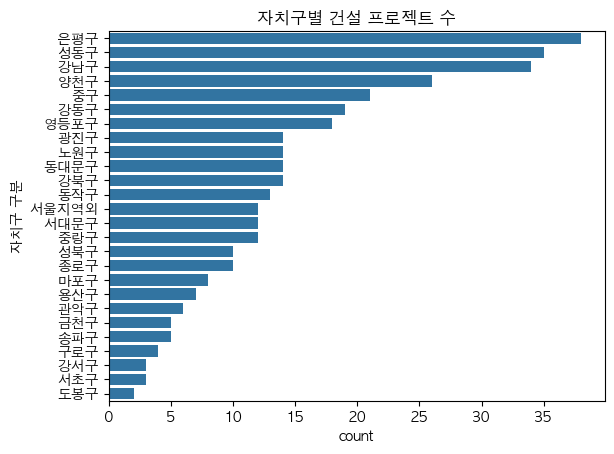

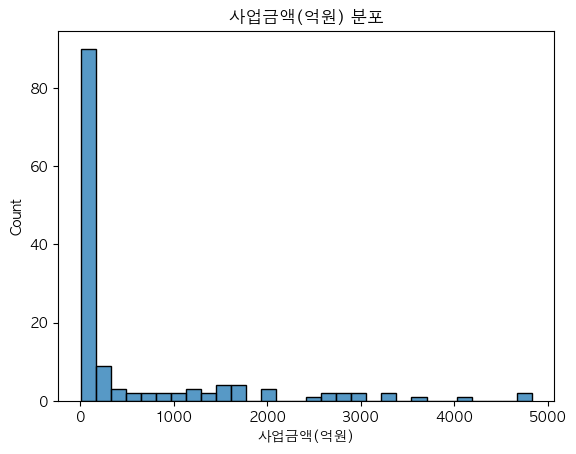

In [52]:
# 자치구별 프로젝트 수
sns.countplot(data=construction_df, y='자치구 구분', order=construction_df['자치구 구분'].value_counts().index)
plt.title('자치구별 건설 프로젝트 수')
plt.show()

# 사업금액 분포
sns.histplot(construction_df['사업금액(억원)'].dropna(), bins=30)
plt.title('사업금액(억원) 분포')
plt.show()

In [ ]:
import folium

# 결측치 제거
construction_df_valid = construction_df.dropna(subset=['위치좌표(위도)', '위치좌표(경도)'])

# 지도 생성 (서울시청 기준)
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 공사 위치 마커 추가
for idx, row in construction_df_valid.iterrows():
    folium.CircleMarker(
        location=[row['위치좌표(위도)'], row['위치좌표(경도)']],
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        popup=f"{row['프로젝트 명']} ({row['자치구 구분']})"
    ).add_to(m)

m  # Jupyter에서 지도 출력

## 서울시 건축물 유출지하수 현황
- 가락동, 풍납동, 창동, 신월동, 휘경동 ... 순으로 유출지하수가 많음

In [53]:
print("서울시 건축물 유출지하수 현황")
print("info:")
print(building_underground_water_df.info())
print("head:")
print(building_underground_water_df.head())

서울시 건축물 유출지하수 현황
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18206 entries, 0 to 18205
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   건축물명                 18201 non-null  object 
 1   건축물 위치               18008 non-null  object 
 2   층수(지상_지하)            15551 non-null  object 
 3   연면적                  3699 non-null   object 
 4   조사년도                 18206 non-null  int64  
 5   총발생량(톤)              17613 non-null  float64
 6   일평균발생량(톤/일)          18113 non-null  float64
 7   일평균이용현황(톤/일)_하천방류    1996 non-null   float64
 8   일평균이용현황(톤/일)_도로청소    1943 non-null   float64
 9   일평균이용현황(톤/일)_공원용수    3252 non-null   float64
 10  일평균이용현황(톤/일)_화장실세척   2788 non-null   float64
 11  일평균이용현황(톤/일)_건물용수    7800 non-null   float64
 12  미사용_하수도방류(톤/일)       17936 non-null  float64
 13  일평균이용현황(톤/일)_기타건물용수  396 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 1.9+ MB
None
h

In [54]:
print("결측치:")
print(building_underground_water_df.isnull().sum())

결측치:
건축물명                       5
건축물 위치                   198
층수(지상_지하)               2655
연면적                    14507
조사년도                       0
총발생량(톤)                  593
일평균발생량(톤/일)               93
일평균이용현황(톤/일)_하천방류      16210
일평균이용현황(톤/일)_도로청소      16263
일평균이용현황(톤/일)_공원용수      14954
일평균이용현황(톤/일)_화장실세척     15418
일평균이용현황(톤/일)_건물용수      10406
미사용_하수도방류(톤/일)           270
일평균이용현황(톤/일)_기타건물용수    17810
dtype: int64


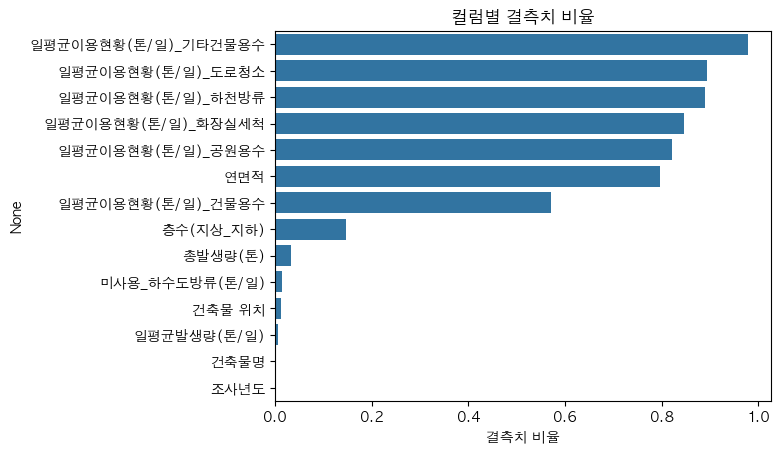

In [55]:
# 결측치 비율 시각화
missing = building_underground_water_df.isnull().mean().sort_values(ascending=False)
sns.barplot(x=missing.values, y=missing.index)
plt.title('컬럼별 결측치 비율')
plt.xlabel('결측치 비율')
plt.show()

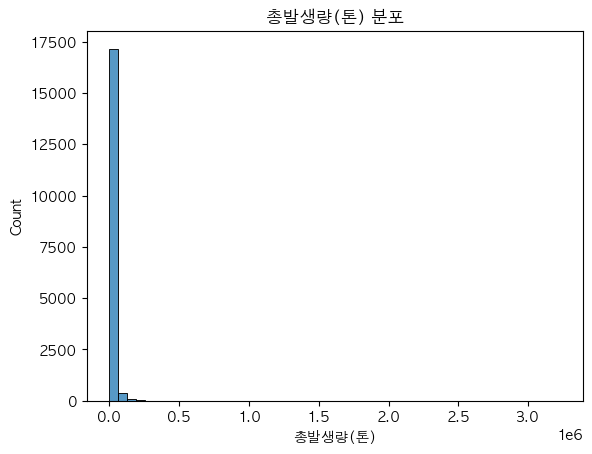

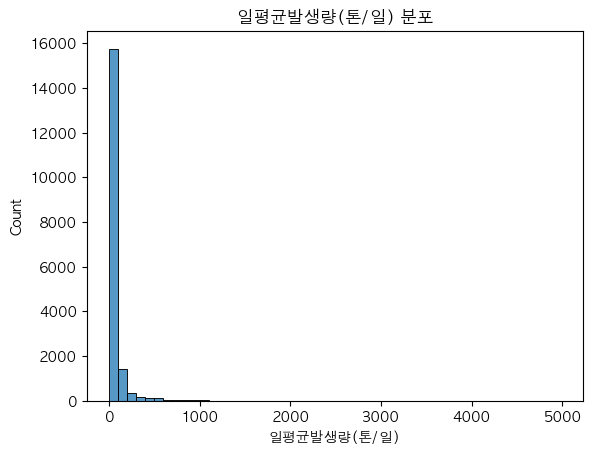

In [56]:
# 총발생량(톤) 분포
sns.histplot(building_underground_water_df['총발생량(톤)'].dropna(), bins=50)
plt.title('총발생량(톤) 분포')
plt.show()

# 일평균발생량(톤/일) 분포
sns.histplot(building_underground_water_df['일평균발생량(톤/일)'].dropna(), bins=50)
plt.title('일평균발생량(톤/일) 분포')
plt.show()

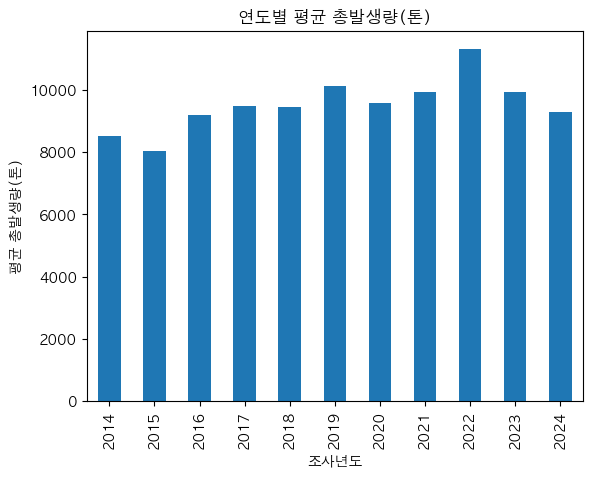

In [57]:
# 연도별 총발생량 평균
yearly = building_underground_water_df.groupby('조사년도')['총발생량(톤)'].mean()
yearly.plot(kind='bar')
plt.title('연도별 평균 총발생량(톤)')
plt.ylabel('평균 총발생량(톤)')
plt.show()

In [ ]:
building_underground_water_df.head()

In [26]:
import re

def extract_dong(address):
    # 괄호 안에 '동'으로 끝나는 단어 추출
    if pd.isnull(address):
        return None
    match = re.search(r'\(([^)]*동)', address)
    if match:
        return match.group(1)
    else:
        # 괄호가 없을 때도 '동'으로 끝나는 단어가 있으면 추출
        match2 = re.search(r'([가-힣]+동)', address)
        if match2:
            return match2.group(1)
        else:
            return None

building_underground_water_df['동'] = building_underground_water_df['건축물 위치'].apply(extract_dong)

In [ ]:
building_underground_water_df['동'] = building_underground_water_df['건축물 위치'].apply(extract_dong)

dong_mean = building_underground_water_df.groupby('동')['총발생량(톤)'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=dong_mean.values, y=dong_mean.index)
plt.title('동별 평균 총발생량(톤) (상위 20개)')
plt.xlabel('평균 총발생량(톤)')
plt.show()

## 서울시 공사현장 유출지하수 공간정보(2019년)
- 데이터가 있긴한데 개수가 너무 적음 (12개)

In [58]:
print("서울시 공사현장 유출지하수 공간정보(2019년)")
print("info:")
print(construction_underground_water_df.info())
print("head:")
print(construction_underground_water_df.head())

서울시 공사현장 유출지하수 공간정보(2019년)
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   관리번호    12 non-null     object 
 1   자치구     12 non-null     object 
 2   등록년도    12 non-null     int64  
 3   공사명     12 non-null     object 
 4   공사위치    12 non-null     object 
 5   X좌표     12 non-null     float64
 6   Y좌표     12 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 804.0+ bytes
None
head:
        관리번호  자치구  등록년도                            공사명  \
0  2019_0001  성동구  2019                 뚝섬 부영복합빌딩 신축공사   
1  2019_0002  중랑구  2019  서울 양원지구 C-2BL 금강펜테리음 아파트 신축공사   
2  2019_0003  광진구  2019       e편한세상 광진 그랜드파크 공동주택 신축공사   
3  2019_0004  강서구  2019                가양역 지식산업센터 신축공사   
4  2019_0005  중랑구  2019       서울 양원 힐데스하임 참좋은 아파트 신축공사   

                     공사위치        X좌표            Y좌표  
0   서울시 성동구 성수동1가 685-701  203830.61  449268.719999

In [59]:
construction_underground_water_df.head()

,관리번호,자치구,등록년도,공사명,공사위치,X좌표,Y좌표
0,2019_0001,성동구,2019,뚝섬 부영복합빌딩 신축공사,서울시 성동구 성수동1가 685-701,203830.61,449268.719999
1,2019_0002,중랑구,2019,서울 양원지구 C-2BL 금강펜테리음 아파트 신축공사,서울시 중랑구 신내동,208774.00,456259.599999
2,2019_0003,광진구,2019,e편한세상 광진 그랜드파크 공동주택 신축공사,서울시 광진구 화양동,206306.80,449664.799999
3,2019_0004,강서구,2019,가양역 지식산업센터 신축공사,서울시 강서구 등촌동 628-9외 2필지,187230.41,451178.119999
4,2019_0005,중랑구,2019,서울 양원 힐데스하임 참좋은 아파트 신축공사,서울시 중랑구 망우동,209181.20,455109.999999


In [60]:
print("결측치:")
print(construction_underground_water_df.isnull().sum())

결측치:
관리번호    0
자치구     0
등록년도    0
공사명     0
공사위치    0
X좌표     0
Y좌표     0
dtype: int64


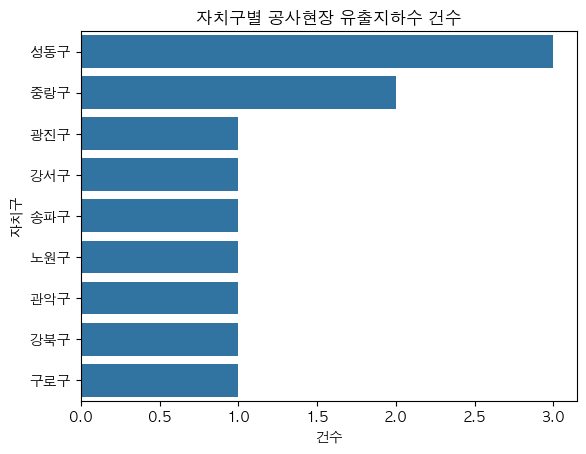

In [61]:
sns.countplot(data=construction_underground_water_df, y='자치구', order=construction_underground_water_df['자치구'].value_counts().index)
plt.title('자치구별 공사현장 유출지하수 건수')
plt.xlabel('건수')
plt.ylabel('자치구')
plt.show()

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

crs_candidates = [5181, 5186, 5174, 5178, 5179, 2097]
for crs_code in crs_candidates:
    gdf = gpd.GeoDataFrame(
        construction_underground_water_df,
        geometry=[Point(x, y) for x, y in zip(construction_underground_water_df['X좌표'], construction_underground_water_df['Y좌표'])],
        crs=f'EPSG:{crs_code}'
    )
    gdf = gdf.to_crs(epsg=4326)
    print(f'CRS: {crs_code}')
    print(gdf[['geometry']].head())
    print(gdf.geometry.x.head(), gdf.geometry.y.head())
    print('-'*40)

In [ ]:
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(
    construction_underground_water_df,
    geometry=[Point(x, y) for x, y in zip(construction_underground_water_df['X좌표'], construction_underground_water_df['Y좌표'])],
    crs='EPSG:5181'
)
# 위경도 좌표계로 변환
gdf = gdf.to_crs(epsg=4326)
gdf['경도'] = gdf.geometry.x
gdf['위도'] = gdf.geometry.y

import folium
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
for idx, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=6,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f"{row['공사명']} ({row['자치구']})"
    ).add_to(m)
m

## 서울시 도로굴착 공사 현황

In [62]:
print("서울시 도로굴착 공사 현황")
print("info:")
road_construction_df.info()
print("head")
road_construction_df.head()

서울시 도로굴착 공사 현황
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   관리코드       533 non-null    object
 1   구          533 non-null    object
 2   동          533 non-null    object
 3   공사명        533 non-null    object
 4   착공일 ~ 준공일  533 non-null    object
 5   신청자        533 non-null    object
 6   처리상태       533 non-null    object
 7   도로         533 non-null    object
 8   포장         533 non-null    object
 9   허가번호       482 non-null    object
dtypes: object(10)
memory usage: 41.8+ KB
head


,관리코드,구,동,공사명,착공일 ~ 준공일,신청자,처리상태,도로,포장,허가번호
0,인터넷-230306-01,성동구,행당동,동북선도시철도1공구 101정거장 특별피난계단<BR>(성동구 행당동 192-8 ~...,-- ~ --,인터넷 개인굴착 그룹,신청자접수완료,특별시도,차도/보도,NaN
1,인터넷-220604-01,종로구,이화동,이화동149번지 하수관연결공사<BR>(종로구 이화동 149 ~ 이화동 149),2022-06-15 ~ 2022-06-19,인터넷 개인굴착 그룹,착공계 접수,구도,차도/보도,종로구-2022-개인-00060
2,인터넷-220602-02,성북구,길음동,길음역세권 주택재개발사업중(지하연결통로공사)<BR>(성북구 길음동 875-1 ~...,-- ~ --,인터넷 개인굴착 그룹,허가,구도,차도,성북구-2022-개인-00067
3,인터넷-220602-02,성북구,길음동,길음역세권 주택재개발사업중(지하연결통로공사)<BR>(성북구 길음동 541-6 ~...,-- ~ --,인터넷 개인굴착 그룹,허가,특별시도,보도,성북구-2022-개인-00067
4,인터넷-211110-22,금천구,시흥동,신안산선 복선전철 3-1공구<BR>(금천구 시흥동 1001-11 ~ 시흥동 ...,2021-11-15 ~ 2021-11-30,인터넷 개인굴착 그룹,착공계 접수,특별시도,보도,금천구-2021-개인-00163


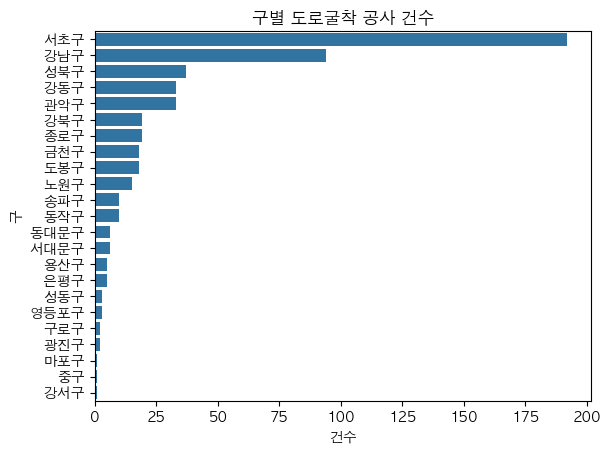

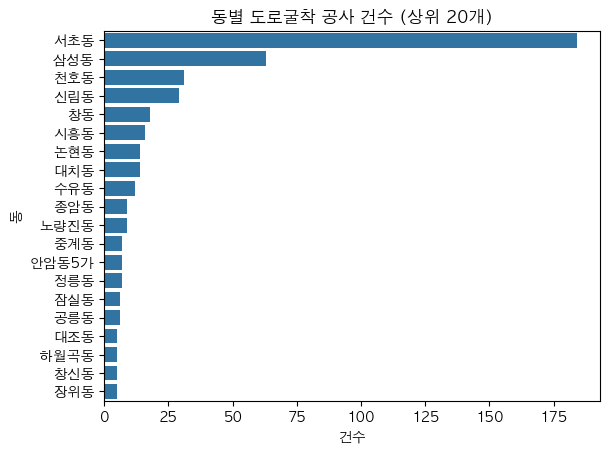

In [63]:
# 구별 공사 건수
sns.countplot(data=road_construction_df, y='구', order=road_construction_df['구'].value_counts().index)
plt.title('구별 도로굴착 공사 건수')
plt.xlabel('건수')
plt.ylabel('구')
plt.show()

# 동별 상위 20개 공사 건수
top_dong = road_construction_df['동'].value_counts().head(20)
sns.barplot(x=top_dong.values, y=top_dong.index)
plt.title('동별 도로굴착 공사 건수 (상위 20개)')
plt.xlabel('건수')
plt.ylabel('동')
plt.show()

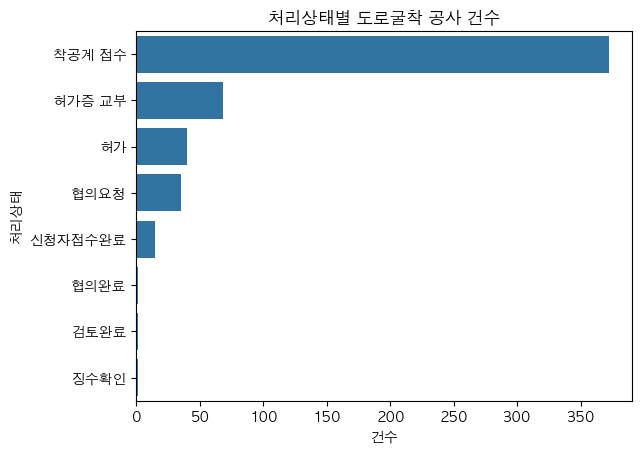

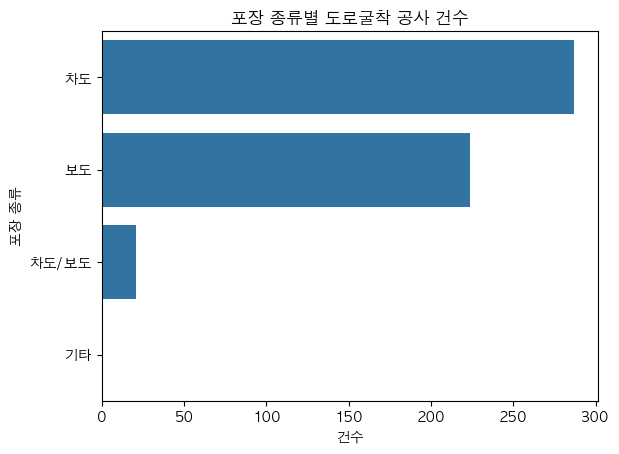

In [64]:
# 처리상태 분포
sns.countplot(data=road_construction_df, y='처리상태', order=road_construction_df['처리상태'].value_counts().index)
plt.title('처리상태별 도로굴착 공사 건수')
plt.xlabel('건수')
plt.ylabel('처리상태')
plt.show()

# 포장 종류 분포
sns.countplot(data=road_construction_df, y='포장', order=road_construction_df['포장'].value_counts().index)
plt.title('포장 종류별 도로굴착 공사 건수')
plt.xlabel('건수')
plt.ylabel('포장 종류')
plt.show()

In [ ]:
import pandas as pd

def get_duration(row):
    try:
        start, end = row.split('~')
        start = start.strip()
        end = end.strip()
        if start == '--' or end == '--':
            return None
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        return (end_date - start_date).days
    except:
        return None

road_construction_df['공사기간(일)'] = road_construction_df['착공일 ~ 준공일'].apply(get_duration)

# 공사기간 분포
sns.histplot(road_construction_df['공사기간(일)'].dropna(), bins=30)
plt.title('공사기간(일) 분포')
plt.xlabel('공사기간(일)')
plt.show()

## 지반침하정보현황(제공표준)

In [65]:
print("지반침하정보현황(제공표준)")
print("info:")
sinkhole_df.info()
print("head")
sinkhole_df.head()

지반침하정보현황(제공표준)
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도명         300 non-null    object 
 1   시군구명        299 non-null    object 
 2   지반침하지역상세정보  298 non-null    object 
 3   위도          300 non-null    float64
 4   경도          300 non-null    float64
 5   발생일자        300 non-null    int64  
 6   발생규모폭       300 non-null    float64
 7   발생규모연장      300 non-null    float64
 8   발생규모깊이      300 non-null    float64
 9   발생지역지질종류명   59 non-null     object 
 10  최초발생원인      294 non-null    object 
 11  피해사망자수      300 non-null    int64  
 12  피해부상자수      300 non-null    int64  
 13  피해차량대수      300 non-null    int64  
 14  복구상태명       300 non-null    object 
 15  복구방법        300 non-null    object 
 16  복구비용        300 non-null    int64  
 17  복구완료일자      300 non-null    object 
 18  데이터기준일자     300 non-null    object 
dtypes: float

,시도명,시군구명,지반침하지역상세정보,위도,경도,발생일자,발생규모폭,발생규모연장,발생규모깊이,발생지역지질종류명,최초발생원인,피해사망자수,피해부상자수,피해차량대수,복구상태명,복구방법,복구비용,복구완료일자,데이터기준일자
0,경기도,고양시 덕양구,행신동 1121,0.0000,0.000,20190722,1.0,1.0,0.5,NaN,맨홀 파손,0,0,0,복구완료,맨홀 주변 포장후 복구완료,0,2019-07-24,0001-01-01
1,경기도,고양시 덕양구,화전동 274-3,0.0000,0.000,20190822,1.0,1.0,0.5,NaN,도로다짐 불량,0,0,0,복구완료,도로포장 복구완료,0,2019-08-24,0001-01-01
2,경기도,고양시 덕양구,226-4번지,0.0000,0.000,20190508,0.5,0.5,1.0,NaN,하수관 손상,0,0,0,복구완료,관로 교체 및 포장 복구 완료,0,2019-05-29,2019-11-22
3,경기도,고양시 덕양구,976,37.6324,126.833,20220803,1.0,1.0,1.5,NaN,NaN,0,0,0,복구완료,되메우기,0,2022-08-03,0001-01-01
4,경기도,고양시 덕양구,298-3,0.0000,0.000,20190212,1.0,1.0,3.0,NaN,하수관 손상,0,0,0,복구완료,우수관로 교체 및 도로 포장 복구 완료,0,2019-06-30,2019-11-22


In [66]:
print(sinkhole_df.isnull().sum())

시도명             0
시군구명            1
지반침하지역상세정보      2
위도              0
경도              0
발생일자            0
발생규모폭           0
발생규모연장          0
발생규모깊이          0
발생지역지질종류명     241
최초발생원인          6
피해사망자수          0
피해부상자수          0
피해차량대수          0
복구상태명           0
복구방법            0
복구비용            0
복구완료일자          0
데이터기준일자         0
dtype: int64


In [67]:
import folium

# 결측치 제거
sinkhole_valid = sinkhole_df.dropna(subset=['위도', '경도'])

m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
for idx, row in sinkhole_valid.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f"ID: {row['ID']}" if 'ID' in row else None
    ).add_to(m)
m

In [ ]:
# 발생원인별 빈도
sns.countplot(data=sinkhole_df, y='최초발생원인', order=sinkhole_df['최초발생원인'].value_counts().index)
plt.title('지반침하 최초발생원인 분포')
plt.show()

# 복구상태별 빈도
sns.countplot(data=sinkhole_df, y='복구상태', order=sinkhole_df['복구상태'].value_counts().index)
plt.title('지반침하 복구상태 분포')
plt.show()

In [ ]:
# 피해 규모(예: 피해면적, 피해금액 등) 분포
if '피해면적' in sinkhole_df.columns:
    sns.histplot(sinkhole_df['피해면적'].dropna(), bins=30)
    plt.title('피해면적 분포')
    plt.show()
if '복구비용' in sinkhole_df.columns:
    sns.histplot(sinkhole_df['복구비용'].dropna(), bins=30)
    plt.title('복구비용 분포')
    plt.show()